In [1]:
pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.3 MB/s eta 0:00:00


In [6]:
import cv2
import numpy as np
from mtcnn import MTCNN

def crop_faces_from_image(image_path, output_prefix='cropped_face')
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    detections = detector.detect_faces(img_rgb)
    if not detections:
        print("No faces detected.")
        return

    for i, detection in enumerate(detections):
        x, y, width, height = detection['box']
        x, y, width, height = int(x), int(y), int(width), int(height)

        cropped_face = img[y:y+height, x:x+width]
        
        output_file = f'{output_prefix}_{i}.jpg'
        cv2.imwrite(output_file, cropped_face)
        print(f'Face {i} cropped and saved as "{output_file}"')




In [3]:
import tensorflow as tf
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

img_height = 224
img_width = 224

base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, pooling='avg')

def load_and_preprocess_image(img_path):

    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch axis
    img_array = preprocess_input(img_array)  # Preprocess input for MobileNetV2
    return img_array

def get_embeddings(model, img_array):
    embeddings = model.predict(img_array)
    return embeddings

def prepare_dataset_embeddings(train_dir):
    image_paths = []
    labels = []
    embeddings = []

    for class_dir in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_dir)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img_array = load_and_preprocess_image(img_path)
                embedding = get_embeddings(base_model, img_array)
                embeddings.append(embedding[0])
                labels.append(class_dir)
                image_paths.append(img_path)

    return np.array(embeddings), np.array(labels), image_paths


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
import joblib
from sklearn.preprocessing import LabelEncoder
def predict_image_male(img_path):
    crop_faces_from_image(img_path)
    img_array = load_and_preprocess_image('/content/cropped_face_0.jpg')
    embedding = get_embeddings(base_model, img_array)
    knn_classifier = joblib.load('/content/drive/MyDrive/celebrity_look_alike_male_knn_model.joblib')
    print("Model loaded successfully")
    predicted_label = knn_classifier.predict(embedding)
    path_to_label_encoder = '/content/drive/MyDrive/celebrity_look_alike_male_label_encoder.pkl' # Load the label encoder from the specified path
    label_encoder = joblib.load(path_to_label_encoder)
    predicted_class_name = label_encoder.inverse_transform(predicted_label)
    return predicted_class_name[0]



Face 0 cropped and saved as "cropped_face_0.jpg"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Model loaded successfully
The image is predicted to be 'Brad Pitt'


Text(5, 20, 'Brad Pitt')

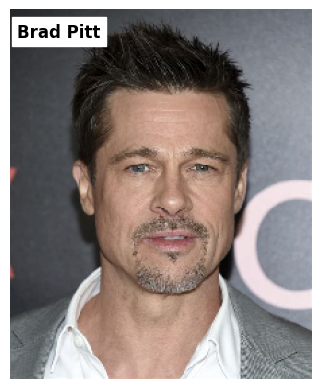

In [9]:
img_path = '/content/drive/MyDrive/hollywood_celeb_male/Brad Pitt/001_c04300ef.jpg'
predicted_class_name = predict_image_male(img_path)
print(f"The image is predicted to be '{predicted_class_name}'")

import matplotlib.pyplot as plt
img=image.load_img(img_path, target_size=(275, img_width))
plt.imshow(img)
plt.axis('off')
plt.text(5, 20,predicted_class_name, fontsize=12, color='black', weight='bold', backgroundcolor='white')

In [10]:
import joblib
from sklearn.preprocessing import LabelEncoder
def predict_image_female(img_path):
    crop_faces_from_image(img_path)
    img_array = load_and_preprocess_image('/content/cropped_face_0.jpg')
    embedding = get_embeddings(base_model, img_array)
    knn_classifier = joblib.load('/content/drive/MyDrive/celebrity_look_alike_female_knn_model.joblib')
    print("Model loaded successfully")
    predicted_label = knn_classifier.predict(embedding)
    path_to_label_encoder = '/content/drive/MyDrive/celebrity_look_alike_female_label_encoder.pkl' # Load the label encoder from the specified path
    label_encoder = joblib.load(path_to_label_encoder)
    predicted_class_name = label_encoder.inverse_transform(predicted_label)
    return predicted_class_name[0]



Face 0 cropped and saved as "cropped_face_0.jpg"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Model loaded successfully
The image is predicted to be 'Angelina Jolie'


Text(5, 20, 'Angelina Jolie')

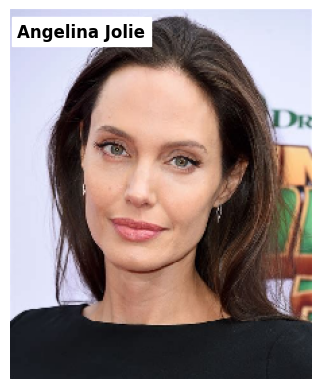

In [12]:
img_path = '/content/drive/MyDrive/hollywood_celeb_female/Angelina Jolie/001_fe3347c0.jpg'
predicted_class_name = predict_image_female(img_path)
print(f"The image is predicted to be '{predicted_class_name}'")

import matplotlib.pyplot as plt
img=image.load_img(img_path, target_size=(275, img_width))
plt.imshow(img)
plt.axis('off')
plt.text(5, 20,predicted_class_name, fontsize=12, color='black', weight='bold', backgroundcolor='white')